In [14]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

## ID 13 시간 범위 불일치

13번 참가자 Food log 날짜가 범위에서 벗어남.  
  
덱스콤 실제 데이터 범위 - 8 days  
2020-05-28 15:21:57  
2020-06-04 12:11:40  
  
Empatica E4 시작 시간  
2020-05-28 13:58:58  
  
Food Log - 8 days  
2019-12-30 16:30  
2020-01-06 09:30  

In [15]:
fl_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/013/Food_Log_013.csv')

fl_df['date']=pd.to_datetime(fl_df['date'])
fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])

In [16]:
new_start = pd.Timestamp("2020-05-28 16:30:00")
old_start = pd.Timestamp("2019-12-30 16:30:00")

# 시간 차이 계산
time_difference = new_start - old_start

# 시간 범위 조정
fl_df['time_begin'] = fl_df['time_begin'] + time_difference

In [17]:
dexcom_df = pd.read_csv('../big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/013/Dexcom_013.csv')
dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])

In [18]:
dexcom_df.iloc[0]['datetime']

Timestamp('2020-05-28 15:26:57')

## 2020-05-28

Index                                        13
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                      94.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)          8101.0
Name: 2020-05-28 15:26:57, dtype: object


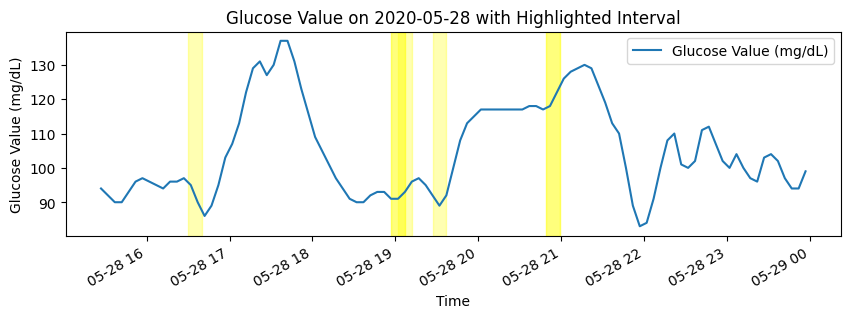

In [19]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-05-28 00:00:00') & (dexcom_df['datetime'] <= '2020-05-28 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-05-28 00:00:00') & (fl_df['time_begin'] <= '2020-05-28 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-05-28 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-05-29

Index                                       116
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     103.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)         39000.0
Name: 2020-05-29 00:01:56, dtype: object


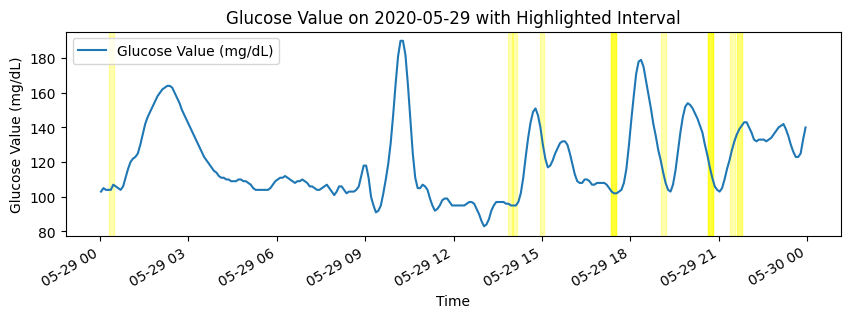

In [20]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-05-29 00:00:00') & (dexcom_df['datetime'] <= '2020-05-29 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-05-29 00:00:00') & (fl_df['time_begin'] <= '2020-05-29 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-05-29 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-05-30

Index                                       404
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     147.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        125397.0
Name: 2020-05-30 00:01:52, dtype: object


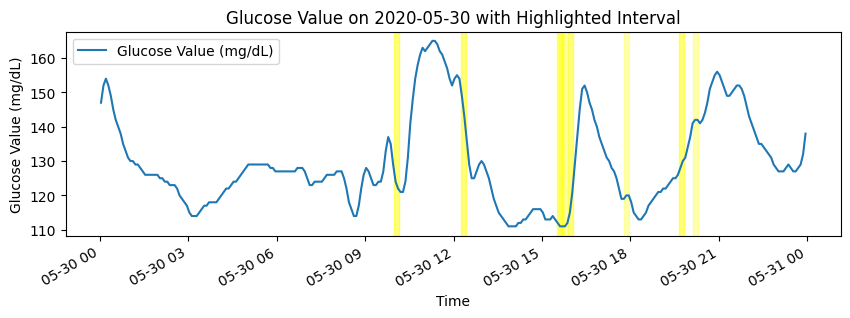

In [21]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-05-30 00:00:00') & (dexcom_df['datetime'] <= '2020-05-30 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-05-30 00:00:00') & (fl_df['time_begin'] <= '2020-05-30 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-05-30 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-05-31

Index                                       692
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     143.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        211795.0
Name: 2020-05-31 00:01:49, dtype: object


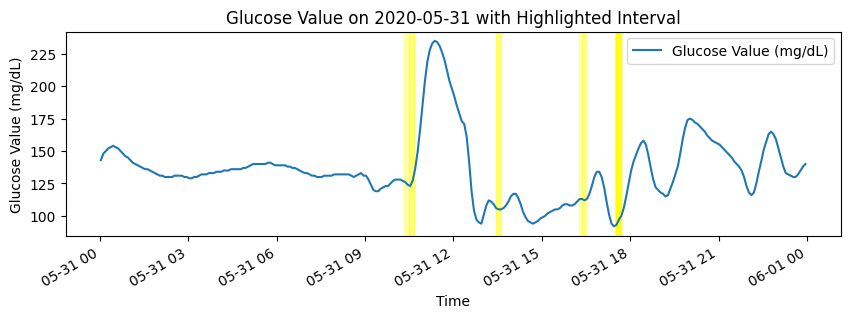

In [22]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-05-31 00:00:00') & (dexcom_df['datetime'] <= '2020-05-31 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-05-31 00:00:00') & (fl_df['time_begin'] <= '2020-05-31 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-05-31 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-06-01

Index                                       980
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     139.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        298193.0
Name: 2020-06-01 00:01:48, dtype: object


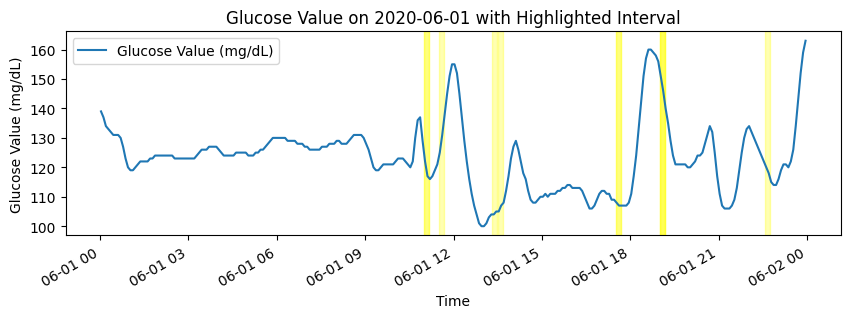

In [23]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-06-01 00:00:00') & (dexcom_df['datetime'] <= '2020-06-01 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-06-01 00:00:00') & (fl_df['time_begin'] <= '2020-06-01 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-06-01 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-06-02

Index                                      1268
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     163.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        384591.0
Name: 2020-06-02 00:01:46, dtype: object


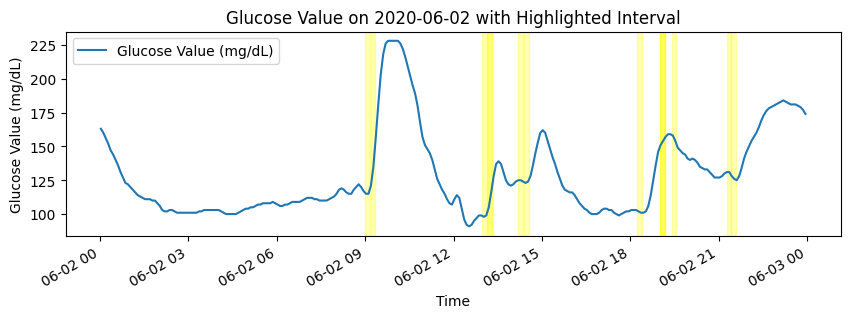

In [24]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-06-02 00:00:00') & (dexcom_df['datetime'] <= '2020-06-02 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-06-02 00:00:00') & (fl_df['time_begin'] <= '2020-06-02 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-06-02 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-06-03

Index                                      1556
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     167.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        470988.0
Name: 2020-06-03 00:01:42, dtype: object


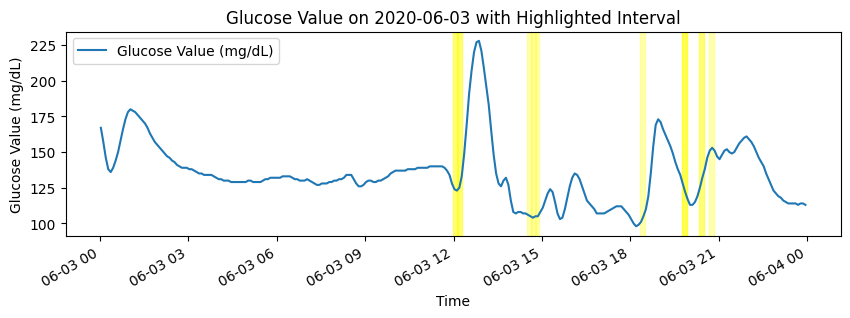

In [25]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-06-03 00:00:00') & (dexcom_df['datetime'] <= '2020-06-03 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-06-03 00:00:00') & (fl_df['time_begin'] <= '2020-06-03 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-06-03 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()

## 2020-06-04

Index                                      1844
Event Type                                  EGV
Event Subtype                               NaN
Patient Info                                NaN
Device Info                                 NaN
Source Device ID                      iPhone G6
Glucose Value (mg/dL)                     110.0
Insulin Value (u)                           NaN
Carb Value (grams)                          NaN
Duration (hh:mm:ss)                         NaN
Glucose Rate of Change (mg/dL/min)          NaN
Transmitter Time (Long Integer)        557386.0
Name: 2020-06-04 00:01:41, dtype: object


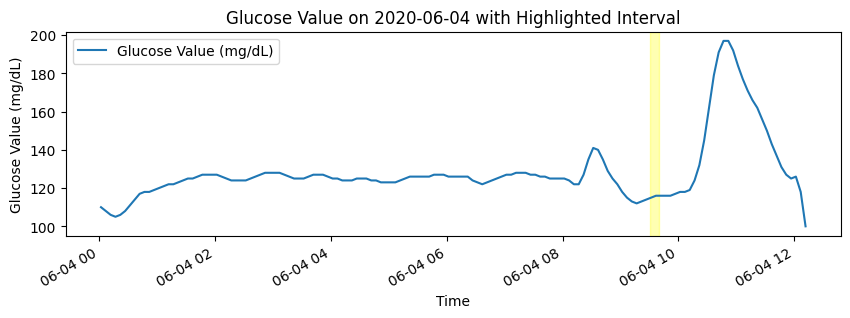

In [26]:
# 날짜 필터링
filtered_df = dexcom_df[(dexcom_df['datetime'] >= '2020-06-04 00:00:00') & (dexcom_df['datetime'] <= '2020-06-04 23:59:59')]
filtered_fl = fl_df[(fl_df['time_begin'] >= '2020-06-04 00:00:00') & (fl_df['time_begin'] <= '2020-06-04 23:59:59')]
# 인덱스를 datetime으로 설정
filtered_df.set_index('datetime', inplace=True)

# 그래프 그리기
ax = filtered_df.plot(y='Glucose Value (mg/dL)', figsize=(10, 3), legend=True)
print(filtered_df.iloc[0])

# 특정 구간 강조
for idx in range(len(filtered_fl)):
    start_time = pd.Timestamp(filtered_fl.iloc[idx]['time_begin'])
    end_time = start_time + pd.Timedelta(minutes=10)
    plt.axvspan(start_time, end_time, color='yellow', alpha=0.3)


# 그래프 제목 및 축 라벨 설정
plt.title('Glucose Value on 2020-06-04 with Highlighted Interval')
plt.xlabel('Time')
plt.ylabel('Glucose Value (mg/dL)')

# 그래프 출력
plt.show()